In [1]:
from modelUtils.vae_utils import find_learning_rate
from utils import data_train_test
import os
import matplotlib.pyplot as plt

In [2]:
cur = os.getcwd()
filepath = os.path.join(cur, '../outputs/megasample_cleaned.csv')

## Finding the best Initial Learning Rate

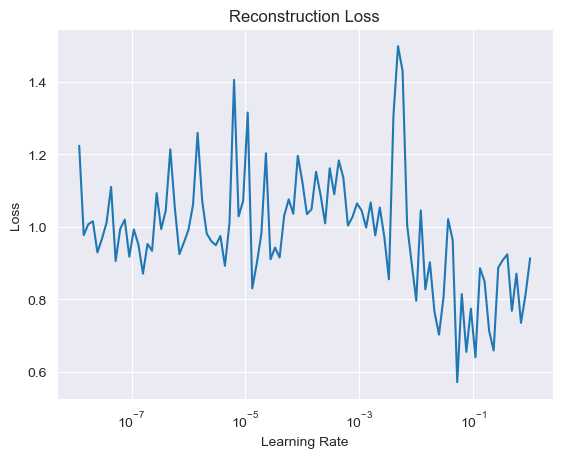

In [3]:
train_data, test_data = data_train_test(filepath)
lrs, rec_losses, kl_losses = find_learning_rate(train_data, batch_size=20, h_dim=[100, 100], z_dim=20)
plt.plot(lrs, rec_losses)
plt.title('Reconstruction Loss')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

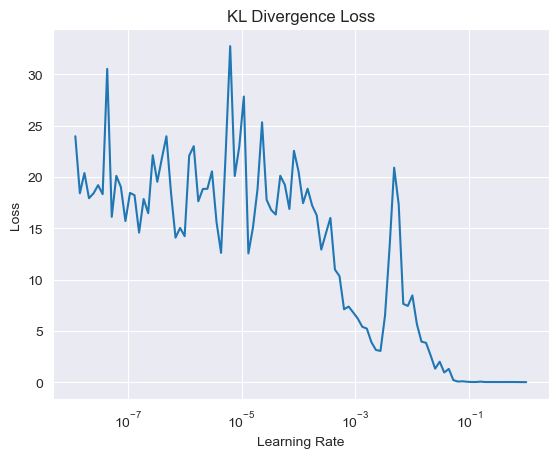

32.74078369140625


In [4]:
plt.plot(lrs, kl_losses)
plt.title('KL Divergence Loss')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()
print(max(kl_losses))

In [5]:
print(f'Best Initial LR for reconstruction loss: {lrs[rec_losses.index(max(rec_losses))]}')
print(f'Best Initial LR for KL Divergence loss: {lrs[kl_losses.index(max(kl_losses))]}')

Best Initial LR for reconstruction loss: 0.00478630093857646
Best Initial LR for KL Divergence loss: 6.30957356406725e-06
